In [1]:
# import libraries
from tensorflow import keras
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import mtcnn
import cv2
import sys, os

# change directory to file loacation
os.chdir(sys.path[0])

In [2]:
# get face
face_detector = mtcnn.MTCNN()
def get_face(img, box):
    x1, y1, width, height = box
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    face = img[y1:y2, x1:x2]
    return face, (x1, y1), (x2, y2)

In [5]:
# load dataset
dataset = np.load(r'..\dataset\vgg16_dataset.npz')

# load model
model = load_model(r'..\model\vgg16_model.h5')

# players class
names = ['Ahmad-Nourollahi', 'Ali-Gholizadeh', 'Alireza-Beiranvand', 'Alireza-Jahanbakhsh', 'Ehsan-Hajsafi', 'Hamed-Lak', 'Hossein-Hosseini', 'Issa-Alekasir', 'Kamal-Kamyabinia', 'Karim-Ansarifard', 'Kaveh-Rezaei', 'Mehdi-Abdi', 'Mehdi-Shiri', 'Mehdi-Taremi', 'Mehdi-Torabi', 'Milad-Mohammadi', 'Milad-Sarlak', 'Mohammad-Hossein-Kanani-Zadegan', 'Omid-Alishah', 'Omid-Noorafkan', 'Sadegh-Moharrami', 'Saeed-Aghaei', 'Saeed-Ezatolahi', 'Saman-Ghoddos', 'Sardar-Azmoun', 'Seyed-Jalal-Hosseini', 'Shoja-Khalilzadeh', 'Vahid-Amiri']

In [6]:
# evaluate model with test data
model.evaluate(dataset['test_images'], dataset['test_labels'])

5/5 [==============================] - 18s 3s/step - loss: 0.7496 - accuracy: 0.8214


[0.7496398091316223, 0.8214285969734192]

In [8]:
# test image loacation
image_path = r'F:/ai/recognition-football-players/data/train_faces/Ehsan-Hajsafi/10_Ehsan-Hajsafi.jpg'

# load image
img = cv2.imread(r"{}".format(image_path))

# detect face
image_ = face_detector.detect_faces(img)
if image_:
    res = max(image_, key=lambda b: b['box'][2] * b['box'][3])
    face, _, _ = get_face(img, res['box'])
    face = cv2.resize(face, (224, 224))
    cv2.imwrite(r"C:\Users\Salimi\Downloads\face.png", face)

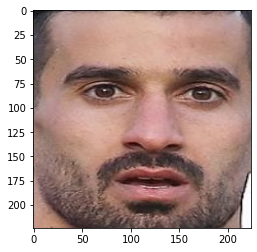

[[3.4597790e-04 7.3172974e-05 1.3326621e-04 9.1103493e-06 9.8602575e-01
  5.4079492e-04 2.9667560e-03 1.0249154e-03 2.4540236e-03 5.7340920e-04
  1.2541763e-04 1.6384303e-04 1.3684396e-03 9.0155743e-05 4.6670637e-05
  9.9075849e-05 5.7984842e-04 3.1157586e-05 3.5435215e-04 3.8813092e-04
  3.4296743e-04 1.4168612e-03 1.9505618e-05 3.2131694e-04 5.4764267e-05
  1.0710498e-04 1.2130521e-04 2.2195397e-04]]
[4]
Pred labels:  Ehsan-Hajsafi


In [9]:
# load image
img = image.load_img(r"C:\Users\Salimi\Downloads\face.png")

# show image
plt.imshow(img)
plt.show()

# convert image to numpy array
img = image.img_to_array(img) 
img = img.astype('float32')/255

img = np.expand_dims(img, axis=0)

# predict image
result = model.predict(img) 
print(result)
result = np.argmax(result, axis=1)
print(result)
print("Pred labels: ", names[result[0]])

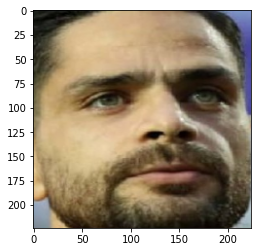

True labels:  Kamal-Kamyabinia
Pred labels:  Kamal-Kamyabinia


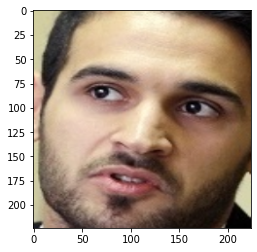

True labels:  Ahmad-Nourollahi
Pred labels:  Ahmad-Nourollahi


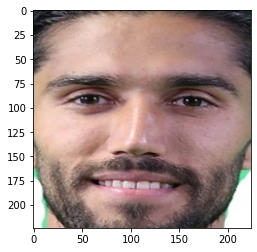

True labels:  Hossein-Hosseini
Pred labels:  Hossein-Hosseini


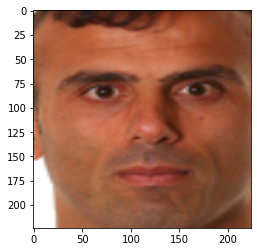

True labels:  Seyed-Jalal-Hosseini
Pred labels:  Seyed-Jalal-Hosseini


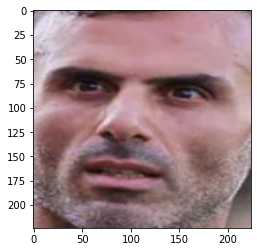

True labels:  Seyed-Jalal-Hosseini
Pred labels:  Seyed-Jalal-Hosseini


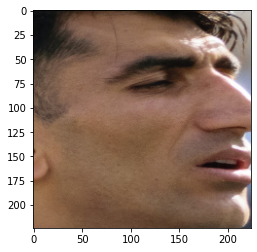

True labels:  Alireza-Beiranvand
Pred labels:  Alireza-Beiranvand


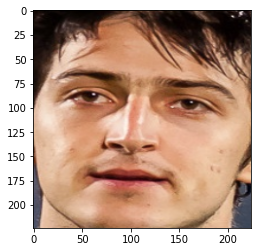

True labels:  Sardar-Azmoun
Pred labels:  Sardar-Azmoun


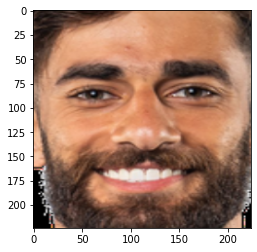

True labels:  Ali-Gholizadeh
Pred labels:  Ali-Gholizadeh


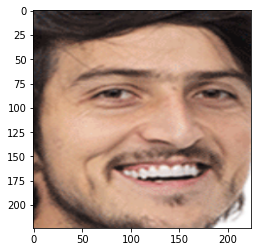

True labels:  Sardar-Azmoun
Pred labels:  Sardar-Azmoun


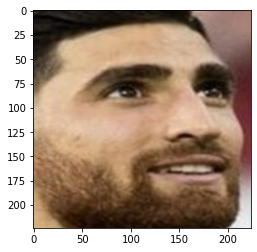

True labels:  Alireza-Jahanbakhsh
Pred labels:  Alireza-Jahanbakhsh


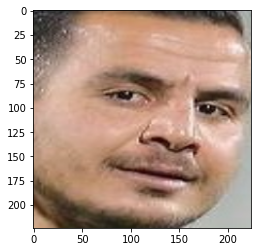

True labels:  Hamed-Lak
Pred labels:  Hamed-Lak


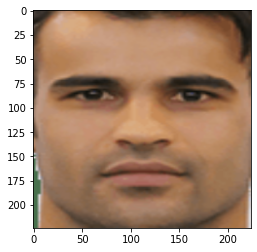

True labels:  Issa-Alekasir
Pred labels:  Issa-Alekasir


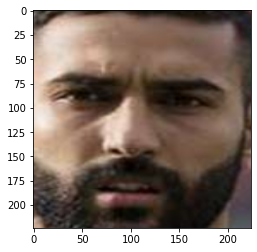

True labels:  Saman-Ghoddos
Pred labels:  Saman-Ghoddos


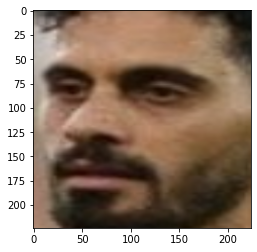

True labels:  Mehdi-Abdi
Pred labels:  Omid-Alishah


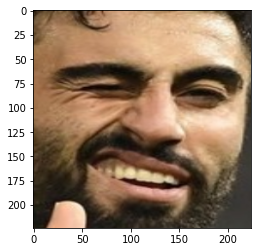

True labels:  Kaveh-Rezaei
Pred labels:  Kaveh-Rezaei


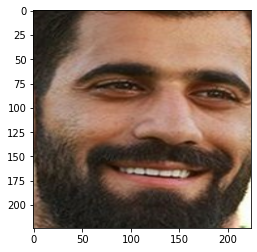

True labels:  Mohammad-Hossein-Kanani-Zadegan
Pred labels:  Mohammad-Hossein-Kanani-Zadegan


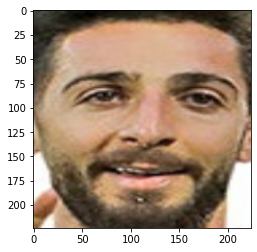

True labels:  Mehdi-Abdi
Pred labels:  Mehdi-Abdi


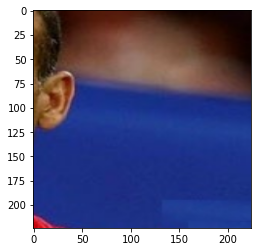

True labels:  Hamed-Lak
Pred labels:  Seyed-Jalal-Hosseini


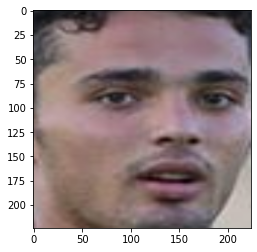

True labels:  Omid-Noorafkan
Pred labels:  Omid-Noorafkan


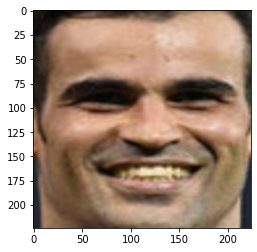

True labels:  Issa-Alekasir
Pred labels:  Issa-Alekasir


In [10]:
# predict test data
test_labels_models = model.predict(dataset['test_images'])
test_labels_models = np.argmax(test_labels_models, axis=1)

for i in range(20):
  # show image
  plt.imshow(dataset['test_images'][i], cmap='gray')
  plt.show()

  # show True and Predict labels
  print("Pred labels: ", names[test_labels_models[i]])
  print("True labels: ", names[np.argmax(dataset['test_labels'][i], axis=0)])